## tarea 8.8

Use el método de Adams-Moulton de tres pasos descrito en clase para resolver el siguiente problema de valor inicial:

y′(t)=te3t−2y,0≤t≤1,y(0)=0. 

Recuerde que este método usa  wi+1  para calcular  wi+1  tal que es necesario resolver algebráicamente la ecuación resultante y así obtener una expresión explícita para  wi+1  que se pueda usar en el código.

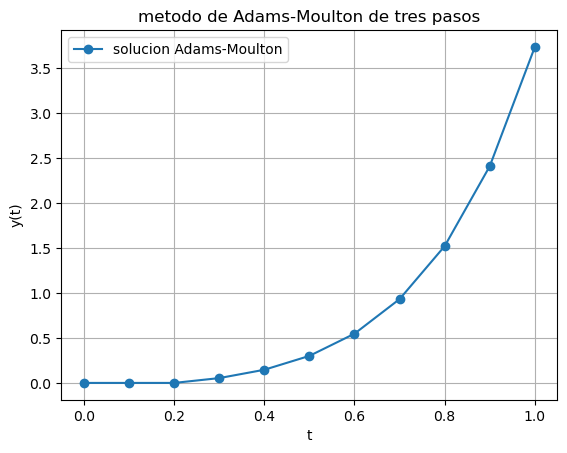

t-values: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y-values: [0.         0.         0.         0.05370854 0.1463923  0.30076599
 0.54772094 0.93287992 1.52244272 2.41205454 3.73929393]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# defino la función f(t, y) que describe la ecuación diferencial.
def f(t, y):
    return t * np.exp(3 * t) - 2 * y

# metodo de Euler para obtener los primeros tres valores.
def euler_method(f, t0, y0, h, num_steps):
    t_values = np.zeros(num_steps)
    y_values = np.zeros(num_steps)
    t_values[0] = t0
    y_values[0] = y0
    for i in range(1, num_steps):
        t_values[i] = t_values[i-1] + h
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])
    return t_values, y_values

# metodo de Adams-Moulton de tres pasos.
def adams_moulton_three_steps(f, t0, y0, h, num_steps):
    # primero obtengo los primeros tres puntos con el metodo de Euler.
    t_values, y_values = euler_method(f, t0, y0, h, 3)
    
    # aumento el tamaño de los arreglos para incluir los pasos restantes.
    t_values = np.zeros(num_steps)  # el arreglo para t debe tener num_steps elementos
    y_values = np.zeros(num_steps)  # el arreglo para y también debe tener num_steps elementos
    
    # uso los primeros tres valores calculados por el método de Euler.
    t_values[:3] = np.array([0, h, 2*h])  # los primeros tres valores de t (0, h, 2h)
    y_values[:3] = np.array([0, y_values[1], y_values[2]])  # Inicializo y_values con los primeros resultados
    
    # aplicamos el metodo de Adams-Moulton de tres pasos a partir de y2.
    for i in range(2, num_steps - 1):  # Comienzo en i=2 porque los primeros tres valores ya están calculados.
        t_values[i + 1] = t_values[i] + h  # Calculo el siguiente t
        
        # predicción inicial para y(i+1) utilizo el metodo de Adams-Moulton de tres pasos.
        y_predict = y_values[i] + (h / 24) * (9 * f(t_values[i+1], y_values[i+1]) +
                                              19 * f(t_values[i], y_values[i]) -
                                              5 * f(t_values[i-1], y_values[i-1]) +
                                              f(t_values[i-2], y_values[i-2]))
        
        # aqui podemos usar una correccion iterativa si es necesario, pero para simplificar,
        # se asigna directamente la predicción.
        y_values[i + 1] = y_predict

    return t_values, y_values

# parametros del problema
t0 = 0  # valor inicial de t
y0 = 0  # valor inicial de y
h = 0.1  # tamaño del paso
num_steps = 11  # numero de pasos (desde t=0 hasta t=1)

# llamo al método de Adams-Moulton de tres pasos.
t_values, y_values = adams_moulton_three_steps(f, t0, y0, h, num_steps)

# grafico la solución.
plt.plot(t_values, y_values, label='solucion Adams-Moulton', marker='o')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('metodo de Adams-Moulton de tres pasos')
plt.legend()
plt.grid(True)
plt.show()

# imprimo los resultados en formato tabular
print("t-values:", t_values)
print("y-values:", y_values)


